This dataset is used in "Facial recognition technology can infer political orientation from naturalistic facial images" by Michal Kosinski and is available at https://osf.io/c58d3/.

In the research, the predictive power of big five personality traits (and of some other features) are compared to the predictive power of facial features extracted from face images. The results showed that the face recognition algorithm did better at predicting political orientation than all other features, and combinations of relevant features. 

Big five personality traits combined gives an accuracy of 66% while face recognition algorithms gives 73%. Among five personality traits, most powerful predictor of political orientation is opennes, reaching to 65% accuracy on its own.

Five of the features in the dataset are informative about subjects' personality traits, expressed in big-five factor structure (extraversion, neuroticism, agreeableness, conscientiousness and openness to experience.)

Big five data is only present for subjects from United States.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeCV

In [11]:
faces = pd.read_csv('faces.csv') # original dataset used in the research, containing other traits of subjects such as
# emotion, head position and existence of facial hair or glasses
data = faces[['ext', 'neu', 'ope', 'agr', 'con','pol','gender','age','country']]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085795 entries, 0 to 1085794
Data columns (total 9 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   ext      98973 non-null    float64
 1   neu      98973 non-null    float64
 2   ope      98973 non-null    float64
 3   agr      98973 non-null    float64
 4   con      98973 non-null    float64
 5   pol      1085795 non-null  object 
 6   gender   1085179 non-null  float64
 7   age      417992 non-null   float64
 8   country  1085795 non-null  object 
dtypes: float64(7), object(2)
memory usage: 74.6+ MB


In [13]:
data = data.dropna()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67834 entries, 3 to 1085793
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ext      67834 non-null  float64
 1   neu      67834 non-null  float64
 2   ope      67834 non-null  float64
 3   agr      67834 non-null  float64
 4   con      67834 non-null  float64
 5   pol      67834 non-null  object 
 6   gender   67834 non-null  float64
 7   age      67834 non-null  float64
 8   country  67834 non-null  object 
dtypes: float64(7), object(2)
memory usage: 5.2+ MB


## Big five

In [15]:
big_five = data[['ext', 'neu', 'ope', 'agr', 'con']]

In [16]:
big_five

,ext,neu,ope,agr,con
3,0.558261,0.634025,0.438256,-0.503514,-2.128320
5,-0.061349,-0.928185,-0.377042,-0.503514,-0.022259
6,-0.185271,0.883979,-1.514169,-0.195723,0.960570
7,0.310417,0.696514,0.211785,-0.204273,-0.443471
8,1.177871,0.009141,-1.192341,-0.888253,-0.256265
...,...,...,...,...,...
1085772,-0.618998,-0.553255,-1.857453,-0.195723,0.047943
1085774,0.713163,-1.709290,-0.580867,0.458333,-0.373269
1085775,-0.185271,-0.865697,-0.422337,-1.536234,0.188347
1085785,0.868066,0.634025,0.178843,-2.683700,-0.139262


In [17]:
big_five.describe()

,ext,neu,ope,agr,con
count,67834.000000,67834.000000,67834.000000,67834.000000,67834.000000
mean,0.104461,0.007523,-0.124859,-0.015690,0.036357
std,1.021286,1.022595,1.087724,1.066733,1.023261
min,-3.159398,-2.177953,-4.861184,-3.966163,-3.532360
25%,-0.618998,-0.719890,-0.784691,-0.657410,-0.724279
50%,0.248456,0.009141,0.030607,0.112068,-0.022259
75%,0.868066,0.634025,0.717174,0.650702,0.679762
max,1.797481,2.821120,1.661204,2.189657,2.083802


Traits are at very similar scales

In [18]:
big_five.corr()

,ext,neu,ope,agr,con
ext,1.000000,-0.350542,0.154428,0.155039,0.158591
neu,-0.350542,1.000000,-0.051740,-0.364611,-0.299006
ope,0.154428,-0.051740,1.000000,0.068311,-0.003908
agr,0.155039,-0.364611,0.068311,1.000000,0.177560
con,0.158591,-0.299006,-0.003908,0.177560,1.000000


To calibrate your sense of correlation: Correlation between getting a cancer and smoking is 0.4

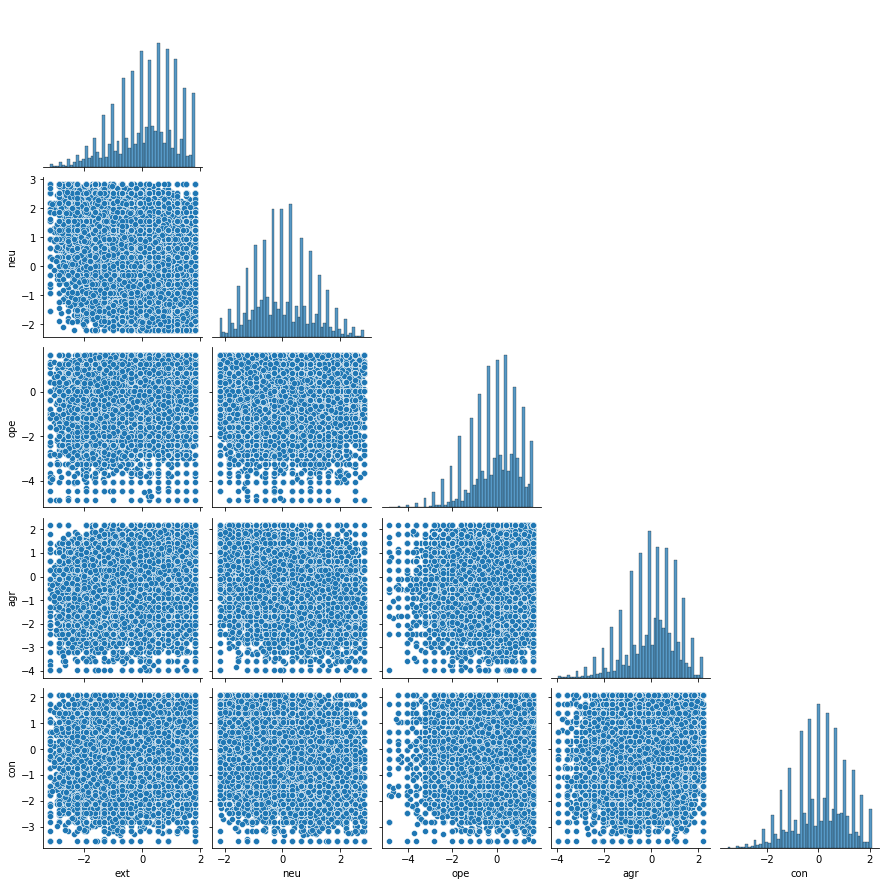

In [19]:
sns.pairplot(data=big_five, corner=True, diag_kws=dict(bins=50))

In [20]:
big_five.skew()

ext   -0.440254
neu    0.194266
ope   -0.636406
agr   -0.470148
con   -0.211430
dtype: float64

High skewnesses excluding 'neu' and 'con'

## Political orientation

In [21]:
def show_class_distr(feature):
    plt.pie(data[feature].value_counts(), labels=data[feature].value_counts().index)

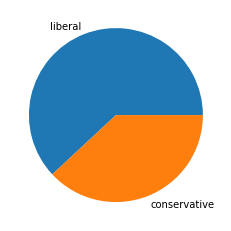

In [22]:
show_class_distr('pol')

<AxesSubplot:xlabel='pol', ylabel='ext'>

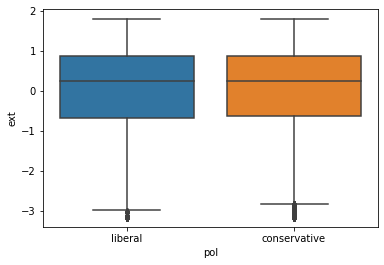

In [23]:
sns.boxplot(data=data, x='pol', y='ext')

<AxesSubplot:xlabel='pol', ylabel='neu'>

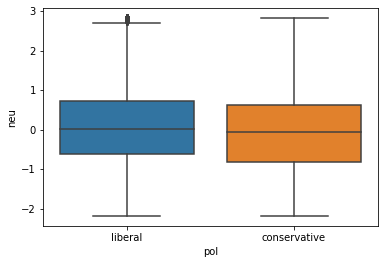

In [24]:
sns.boxplot(data=data, x='pol', y='neu')

<AxesSubplot:xlabel='pol', ylabel='ope'>

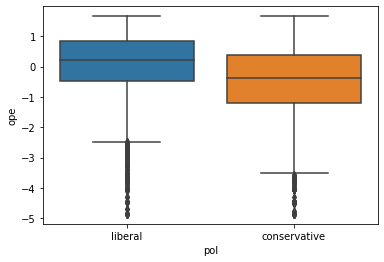

In [25]:
sns.boxplot(data=data, x='pol', y='ope')

<AxesSubplot:xlabel='ope', ylabel='Count'>

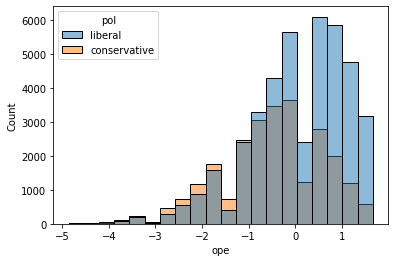

In [28]:
sns.histplot(data=data, x='ope', hue='pol', bins=20)

Most discriminating trait for political orientation is openness, subjects who score higher in openness tend to be liberals.

<AxesSubplot:xlabel='pol', ylabel='agr'>

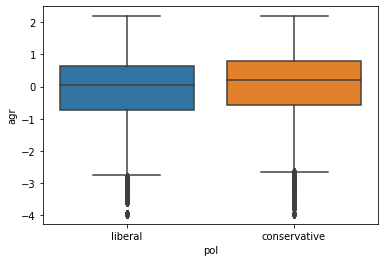

In [19]:
sns.boxplot(data=data, x='pol', y='agr')

<AxesSubplot:xlabel='pol', ylabel='con'>

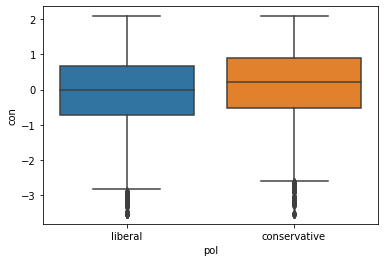

In [20]:
sns.boxplot(data=data, x='pol', y='con')

<AxesSubplot:xlabel='con', ylabel='Count'>

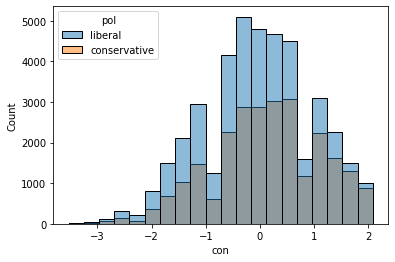

In [29]:
sns.histplot(data=data, x='con', hue='pol', bins=20)

In [7]:
le = LabelEncoder()
le.fit(data.loc[:,'pol'])
data.loc[:,'pol'] = le.transform(data.loc[:,'pol'])

In [8]:
list(le.inverse_transform([0,1]))

['conservative', 'liberal']

In [9]:
data.corr()

,ext,neu,ope,agr,con,pol,gender,age
ext,1.000000,-0.350542,0.154428,0.155039,0.158591,-0.015191,0.006960,-0.035024
neu,-0.350542,1.000000,-0.051740,-0.364611,-0.299006,0.041203,0.172515,-0.028759
ope,0.154428,-0.051740,1.000000,0.068311,-0.003908,0.248770,0.001172,-0.055989
agr,0.155039,-0.364611,0.068311,1.000000,0.177560,-0.038914,0.040795,0.071589
con,0.158591,-0.299006,-0.003908,0.177560,1.000000,-0.082562,0.046132,0.184422
pol,-0.015191,0.041203,0.248770,-0.038914,-0.082562,1.000000,0.043280,-0.024389
gender,0.006960,0.172515,0.001172,0.040795,0.046132,0.043280,1.000000,0.117494
age,-0.035024,-0.028759,-0.055989,0.071589,0.184422,-0.024389,0.117494,1.000000


In [29]:
X = big_five.to_numpy()
pol_truth = data.loc[:,'pol'] 

In [30]:
logreg_pol = LogisticRegressionCV(cv=3, penalty='elasticnet', solver='saga', l1_ratios=[.3,.5,.7], scoring='roc_auc').fit(X, pol_truth)

In [34]:
logreg_pol.scores_[1].mean()

0.6578416780785982

## Gender

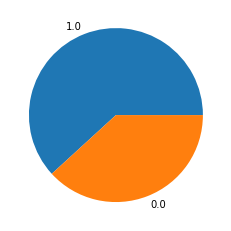

In [35]:
show_class_distr('gender') # encoding: 1 for male, 0 for female

<AxesSubplot:xlabel='gender', ylabel='ext'>

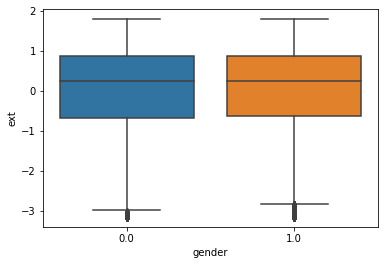

In [36]:
sns.boxplot(data=data, x='gender', y='ext')

<AxesSubplot:xlabel='gender', ylabel='neu'>

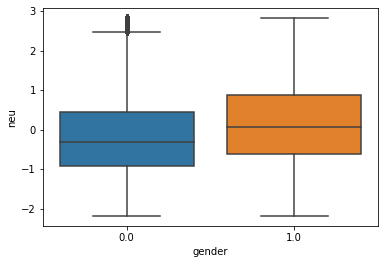

In [37]:
sns.boxplot(data=data, x='gender', y='neu')

<AxesSubplot:xlabel='ope', ylabel='Count'>

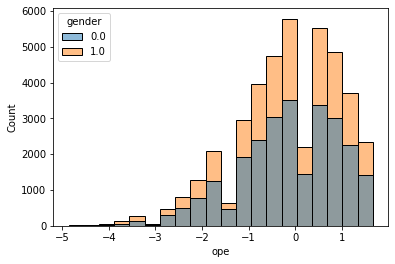

In [30]:
sns.histplot(data=data, x='ope', hue='gender', bins=20)

<AxesSubplot:xlabel='gender', ylabel='ope'>

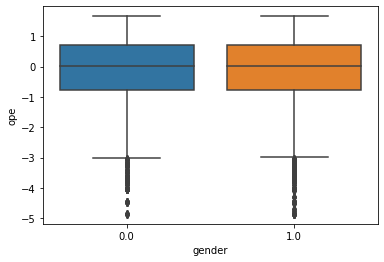

In [38]:
sns.boxplot(data=data, x='gender', y='ope')

<AxesSubplot:xlabel='gender', ylabel='agr'>

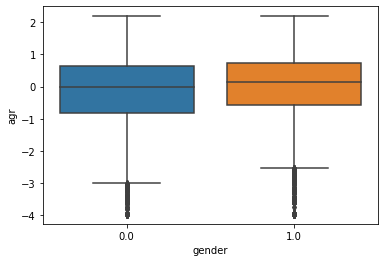

In [39]:
sns.boxplot(data=data, x='gender', y='agr')

<AxesSubplot:xlabel='gender', ylabel='con'>

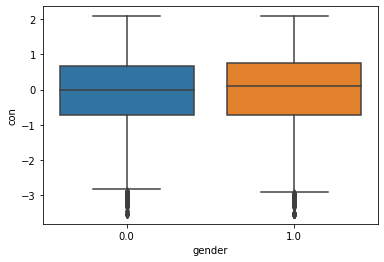

In [40]:
sns.boxplot(data=data, x='gender', y='con')

In [41]:
gender_truth = data.gender.to_numpy()

In [42]:
logreg_gender = LogisticRegressionCV(cv=3, penalty='elasticnet', solver='saga',
                                     l1_ratios=[.3,.5,.7], scoring='roc_auc').fit(X, gender_truth)

In [43]:
logreg_gender.scores_[1].mean()

0.629782798835374

## Age

<AxesSubplot:xlabel='age'>

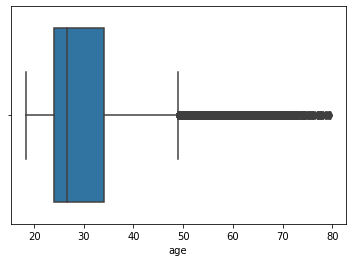

In [44]:
sns.boxplot(data=data, x='age')

<AxesSubplot:xlabel='age', ylabel='Count'>

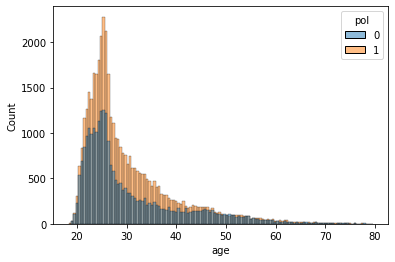

In [45]:
sns.histplot(data=data, x='age', hue='pol')

In [46]:
data.corr().loc[:,'age']

ext      -0.035024
neu      -0.028759
ope      -0.055989
agr       0.071589
con       0.184422
pol      -0.024389
gender    0.117494
age       1.000000
Name: age, dtype: float64

In [47]:
age_truth = data.age.to_numpy()

In [55]:
ridge = RidgeCV(cv=3, alphas=[1e-3, 1e-2, 1e-1, 1], scoring='neg_root_mean_squared_error').fit(X, age_truth)

In [58]:
ridge.best_score_

-9.277849162017118